Q1a Zhiquan Lao

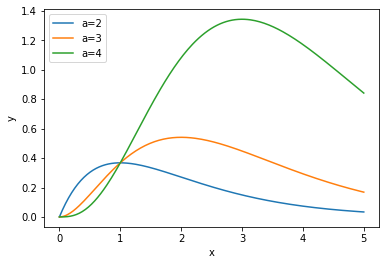

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
def f_1_a(x,a):
  return (x**(a-1))*math.exp(-x)
x_1=np.linspace(0,5,200)
for a in [2,3,4]:
  y_1=[]
  for x in x_1:
    y_1.append(f_1_a(x,a))
  plt.plot(x_1,y_1)
plt.legend(['a=2','a=3','a=4'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Q1b <br>
$ \frac{d(x^{a-1}e^{-x})}{dx}$<br>
$=(a-1)x^{a-2}e^{-x}-x^{a-1}e^{-x}$<br>
$=0$<br>
$(a-1)x^{a-2}=x^{a-1}$<br>
$x=a-1$<br>
$\frac{d^2(x^{a-1}e^{-x})}{dx^2}|_{x=a-1}$<br>
$=(a-1)(a-2)x^{a-3}e^{-x}-(a-1)x^{a-2}e^{-x}-(a-1)x^{a-2}e^{-x}+x^{a-1}e^{-x}$<br>
$=e^{1-a}[(a-1)^{a-2}(a-2)-(a-1)^{a-1}]$<br>
$=e^{1-a}(a-1)^{a-2}(a-2-a+1)$<br>
$=-e^{1-a}(a-1)^{a-2}<0$ for $a\geq2$<br>
Therefore, $x=a-1$ is the maximum

Q1c <br>
$\frac{1}{2}=z=\frac{x}{x+c}$<br>
$c=x$, we could choose $c=a-1$

Q1d (Correction)<br>
$x^{a-1}e^{-x}$<br>
$=e^{-x+(a-1)lnx}$<br>
This expression is better because $-x$ goes to negative infinity while $ln x$ goes to positive infinity. This make the expression less diverge.

Q1e and f

In [ ]:
def f_1_e(a):
  c=a-1
  def f_1_e_sub(z):
    k1=z*c/(1-z)
    return c*math.exp(-k1+(a-1)*math.log(k1))/((1-z)*(1-z))
  return gauss_quad(f_1_e_sub,500,0,1)
def legendre_root_w(n):
  x=[]
  for i in range(n):
    x.append(math.cos(math.pi*(i-0.25)/(n+0.5)))
  x=np.array(x)
  epsilon=1e-15
  delta=1
  while delta>epsilon:
    p0=np.ones(n,float)
    p1=np.copy(x)
    for i in range(1,n):
      p0,p1=p1,((2*i+1)*p1*x-p0*i)/(i+1)
    dp=(n+1)*(p0-x*p1)/(1-x*x)
    dx=p1/dp
    x=x-dx
    delta=max(abs(dx))
  w=2*(n+1)*(n+1)/(n*n*(1-x*x)*dp*dp)
  return x,w
def gauss_quad(func,n,low,up):
  x,w=legendre_root_w(n)
  #print(x)
  #print(w)
  x=0.5*(up-low)*x+0.5*(up+low)
  w=0.5*(up-low)*w
  ans=0
  for i in range(n):
    ans+=func(x[i])*w[i]
    #print(i,ans,x[i],w[i])
  return ans
print('gamma(3/2): '+str(f_1_e(1.5)))
print('gamma(3): '+str(f_1_e(3)))
print('gamma(6): '+str(f_1_e(6)))
print('gamaa(10): '+str(f_1_e(10)))

gamma(3/2): 0.8862269131620184
gamma(3): 1.9999999999999951
gamma(6): 119.9999999999999
gamaa(10): 362879.9999999995


Q2a

In [ ]:
def euler_mac(func,n,low,up):
  point,h=np.linspace(low,up,num=n+1,retstep=True)
  ans=0
  for i in range(len(point)):
    if i==0 or i==len(point)-1:
      ans+=0.5*func(point[i])
    else:
      ans+=func(point[i])
  ans*=h
  f_a=(func(low+h)-func(low-h))/(2*h)
  f_b=(func(up+h)-func(up-h))/(2*h)
  ans+=h*h/12*(f_a-f_b)
  return ans
def trapezoid(func,n,low,up):
  points,step_size=np.linspace(low,up,num=n+1,retstep=True)
  ans=0
  #print(points)
  #print(step_size)
  for i in range(len(points)-1):
    #print(func(points[i]))
    #print(func(points[i+1]))
    ans+=(func(points[i])+func(points[i+1]))/2
  ans=ans*step_size
  return ans
def f_2(x):
  return x*x*x*x-2*x+1
print('Euler–Maclaurin rule: '+str(euler_mac(f_2,10,0,2)))
print('Trapezoid: '+str(trapezoid(f_2,10,0,2)))

Euler–Maclaurin rule: 4.398826666666669
Trapezoid: 4.506560000000002


Q2b<br>
We could use intergration method has higher precision and less calculation cost such as Gaussian Quadrature. We also do not want to compute the differentiation because it generally has larger error.

Q3a) <br>
$q(u)=sin^2(\alpha u)$<br>
For maximum/minimum, $\frac{dq}{du}=0$<br>
or $2\alpha sin(\alpha u)cos(\alpha u)=0$<br>
$u=\frac{n\pi}{2\alpha}$<br>
$\frac{d^2q}{du^2}=2\alpha^2(cos^2\alpha u-sin^2\alpha u)$,<br>
for odd $n$,  $\frac{d^2q}{du^2}|_{u=\frac{\pi n}{2\alpha}}=-2\alpha^2<0$, which is the maximum <br>
Therefore, separation is $\frac{\pi}{\alpha}$


Q3b)

In [ ]:
import cmath
def q(u):
  delta_x=20e-6
  return math.sin(math.pi/delta_x*u)**2

Q3c)

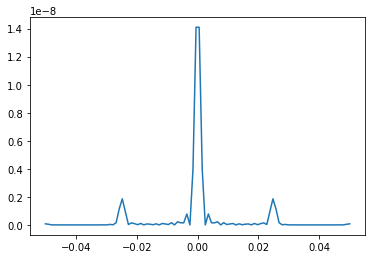

In [ ]:
def I(x):
  lamb=500e-9
  f=1
  w=20e-6*10
  def f_3_c(u):
    k1=math.sqrt(q(u))
    k2=cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    return k1*k2
  return gauss_quad(f_3_c,100,-w/2,w/2)
x_3=np.linspace(-0.05,0.05,100)
I_3=[]
for x in x_3:
  c1=abs(I(x))
  I_3.append(c1**2)
plt.plot(x_3,I_3)

Q3d)

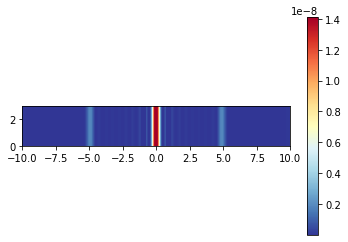

In [ ]:
row_no=3
data_3_d=np.zeros([row_no,100])
for i in range(row_no):
  data_3_d[i]=I_3.copy()
plt.imshow(data_3_d,origin='lower',cmap = 'RdYlBu_r', interpolation = 'sinc',extent=[-10,10,0,3])
plt.colorbar()

Q3ei)

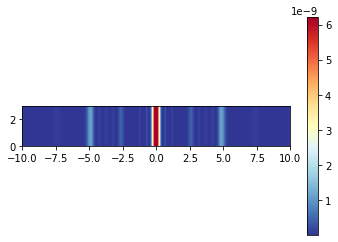

In [ ]:
def q_3_e1(u):
  return q(u)*q(0.5*u)
def I_3_e1(x):
  lamb=500e-9
  f=1
  w=20e-6*10
  def f_3_e1(u):
    k1=math.sqrt(q_3_e1(u))
    k2=cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    return k1*k2
  return gauss_quad(f_3_e1,100,-w/2,w/2)
x_3_e1=np.linspace(-0.05,0.05,100)
I_3_ei=[]
for x in x_3_e1:
  c1=abs(I_3_e1(x))
  I_3_ei.append(c1**2)
row_no=3
data_3_e=np.zeros([row_no,100])
for i in range(row_no):
  data_3_e[i]=I_3_ei.copy()
plt.imshow(data_3_e,origin='lower',cmap = 'RdYlBu_r', interpolation = 'sinc',extent=[-10,10,0,3])
plt.colorbar()

Q3eii)

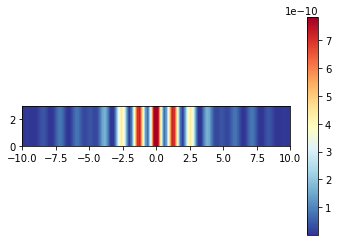

In [ ]:
def q_3_e2(u):
  if u>=30e-6 and u<=50e-6:
    return 1
  if u<=-30e-6 and u>=-40e-6:
    return 1
  return 0
def I_3_e2(x):
  lamb=500e-9
  f=1
  w=20e-6*10
  def f_3_e2(u):
    k1=math.sqrt(q_3_e2(u))
    k2=cmath.exp(1j*2*math.pi*x*u/(lamb*f))
    return k1*k2
  return gauss_quad(f_3_e2,100,-w/2,w/2)
x_3_e2=np.linspace(-0.05,0.05,100)
I_3_eii=[]
for x in x_3_e2:
  c1=abs(I_3_e2(x))
  I_3_eii.append(c1**2)
row_no=3
data_3_eii=np.zeros([row_no,100])
for i in range(row_no):
  data_3_eii[i]=I_3_eii.copy()
plt.imshow(data_3_eii,origin='lower',cmap = 'RdYlBu_r', interpolation = 'sinc',extent=[-10,10,0,3])
plt.colorbar()

*Q4a*) (To see a clear picture for a), b), and c), change n to 10 in each part)

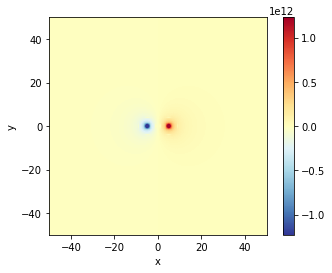

In [ ]:
import matplotlib.colors as colors
def phi(x,y):
  ep_0=8.85e-12
  c1=1/(4*math.pi*ep_0*math.sqrt((x/100-0.05)*(x/100-0.05)+y*y/(10000)))
  c2=-1/(4*math.pi*ep_0*math.sqrt((x/100+0.05)*(x/100+0.05)+y*y/10000))
  return c1+c2
n=50
x_4=np.linspace(-n,n,2*n)
y_4=np.linspace(-n,n,2*n)
data_4=np.zeros([2*n,2*n])
for i in range(len(x_4)):
  for j in range(len(y_4)):
    data_4[j,i]=phi(x_4[i],y_4[j])
plt.xlabel('x')
plt.ylabel('y')
"""
x_4=np.linspace(-15,15,30)
y_4=np.linspace(-15,15,30)
data_4=np.zeros([30,30])
for i in range(len(x_4)):
  for j in range(len(y_4)):
    data_4[j,i]=phi(x_4[i],y_4[j])
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(data_4)):
  print(data_4[i])
"""
"""
pqr_4=np.mean(data_4)

for i in range(len(data_4)):
  for j in range(len(data_4[i])):
    if data_4[i,j]>pqr_4:
      data_4[i,j]=data_4[i,j]+1e10
    else:
      data_4[i,j]-=1e10
"""
plt.imshow(data_4,origin='lower',cmap = 'RdYlBu_r',interpolation='sinc',extent=[-n,n,-n,n])
#plt.imshow(data_4,origin='lower',cmap='RdYlBu_r',interpolation='sinc',extent=[-15,15,-15,15],)
plt.colorbar()
#print(x_4)

Q4b

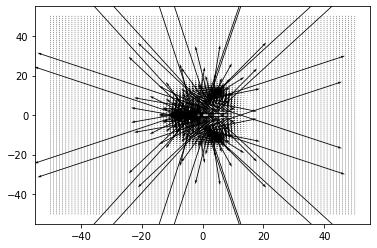

In [ ]:
def partial_x(func,x,y,h=1e-5):
  return (func(x+h,y)-func(x-h,y))/(2*h)
def partial_y(func,x,y,h=1e-5):
  return (func(x,y+h)-func(x,y-h))/(2*h)
def diff(func,x,h=1e-5):
  return (func(x+h)-func(x-h))/(2*h)
def cal_E(x,y):
  return -partial_x(phi,x,y), -partial_y(phi,x,y)
n=50
x_4=np.linspace(-n,n,2*n)
y_4=np.linspace(-n,n,2*n)
u=[]
v=[]
data_4_b=np.zeros([2*n,2*n])
for i in range(len(x_4)):
  for j in range(len(y_4)):
    p1,p2=(cal_E(x_4[i],y_4[j]))
    u.append(p1)
    v.append(p2)
    data_4_b[j,i]=p1*p1+p2*p2
"""
plt.imshow(data_4_b,origin='lower',cmap = 'RdYlBu_r', interpolation = 'sinc',extent=[-n,n,-n,n])
plt.show()
plt.imshow(data_4_b,origin='lower',cmap = 'hsv', interpolation = 'sinc',extent=[-n,n,-n,n])
plt.show()
"""
x_4,y_4=np.meshgrid(x_4,y_4)
plt.quiver(x_4,y_4,u,v)


Q4c (Please wait some times for it to execute (generally takes 5 min))



In [ ]:
def cal_V_4c(x,y):
  ep_0=8.85e-12
  k=1/(4*math.pi*ep_0)
  L=0.1
  def contri_1(a):
    q_0=100
    def contri_2(b):
      sigma=q_0*math.sin(2*math.pi*a/L)*math.sin(2*math.pi*b/L)
      return k*sigma/math.sqrt((x/100-a)*(x/100-a)+(y/100-b)*(y/100-b))
    return gauss_quad(contri_2,5,-0.05,0.05)
  return gauss_quad(contri_1,10,-0.05,0.05)
def cal_E_4c(x,y):
  return -partial_x(cal_V_4c,x,y),-partial_y(cal_V_4c,x,y)
n=50
x_4=np.linspace(-n,n,2*n)
y_4=np.linspace(-n,n,2*n)
u=[]
v=[]
data_4_c=np.zeros([2*n,2*n])
for i in range(len(x_4)):
  for j in range(len(y_4)):
    p1,p2=(cal_E_4c(x_4[i],y_4[j]))
    #print('('+str(i)+' '+str(j)+')',end=', ')
    u.append(p1)
    v.append(p2)
    data_4_c[j,i]=p1*p1+p2*p2

"""
plt.imshow(data_4_c,origin='lower',cmap = 'RdYlBu_r', interpolation = 'sinc',extent=[-n,n,-n,n])
plt.show()
plt.imshow(data_4_c,origin='lower',cmap = 'hsv', interpolation = 'sinc',extent=[-n,n,-n,n])
plt.show()
"""
x_4,y_4=np.meshgrid(x_4,y_4)
plt.quiver(x_4,y_4,u,v)

KeyboardInterrupt: ignored

Q5

In [ ]:
def complex_trapezoid(func,m,N):
  ans=0
  for k in range(0,N):
    z=cmath.exp(2j*math.pi*k/N)
    ans+=func(z)*cmath.exp(-2j*math.pi*k*m/N)
  ans*=math.factorial(m)/N
  return ans
def f_5(z):
  return cmath.exp(2*z)
for m in range(1,21):
  print(complex_trapezoid(f_5,m,10000))

(1.9999999999999925-1.277138117483645e-17j)
(3.99999999999999+8.641663773456543e-17j)
(8.000000000000002-1.1255527759823636e-15j)
(16.000000000000018+5.766175037447141e-15j)
(32.00000000000003-2.2116891651435822e-14j)
(64.00000000000026-1.9221524372170505e-13j)
(128.00000000000168-7.52842788109831e-13j)
(255.99999999998712-4.249492757679718e-12j)
(511.9999999999226-2.916230457117308e-11j)
(1024.000000000446+2.917187291728851e-10j)
(2048.0000000039868+9.457539631441137e-09j)
(4095.999999709018-2.8881649871692618e-08j)
(8191.99999767901-1.5720511861871955e-06j)
(16383.999969751962+2.1102061141675675e-05j)
(32767.999499965485-0.00044065342949579646j)
(65535.99608144405+0.0012433592846889496j)
(131071.93379686632-0.06959484445297903j)
(262142.83101705124-1.9708792001622557j)
(524273.9928697285-52.09592446412324j)
(1048245.9203696527+595.1794140887341j)


Q6a)<br>
$\frac{V_3-V_1}{R}+\frac{V_3-V_+}{R}+\frac{V_3-V_4}{R}=0$<br>
$\frac{V_2-V_1}{R}+\frac{V_2-V_4}{R}+\frac{V_2-0}{R}=0$<br>
$\frac{V_4-V_1}{R}+\frac{V_4-V_3}{R}+\frac{V_4-V_2}{R}+\frac{V_4-0}{R}=0$

Q6b)

In [ ]:
import pprint
"""
def Gauss_elim(A_m,V_m,err=1e-9):
  m=len(A_m)
  A=A_m.copy()
  V=V_m.copy()
  for k in range(m):
    #pprint.pprint(A)
    #pprint.pprint(V)
    if abs(A[k,k])<err:
      return
    div=float(A[k,k])
    A[k,:]/=div
    V[k,:]/=div
    for i in range(k+1,m):
      mult=A[i,k]
      A[i,:]-=mult*A[k,:]
      V[i,:]-=mult*V[k,:]
  if abs(A[m-1,m-1])<err:
    return
  x=np.zeros(m)
  for k in range(m-1,-1,-1):
    x[k]=V[k]
    for i in range(k+1,m):
      x[k]-=x[i]*A[k,i]
  return x
"""
def swap(A,i,j):
  if A.ndim==1:
    A[i],A[j]=A[j],A[i]
  else:
    temp=A[i].copy()
    A[i]=A[j]
    A[j]=temp
def Gauss_elim(A_m,V_m,err=1e-9):
  m=len(A_m)
  A=A_m.copy()
  V=V_m.copy()
  for k in range(m):
    p=np.argmax(A[k:m,k])+k
    if abs(A[p,k])<err:
      return
    if p!=k:
      swap(A,p,k)
      swap(V,p,k)
    div=A[k,k]
    A[k,:]/=div
    V[k,:]/=div
    for i in range(k+1,m):
      mult=A[i,k]
      A[i,:]-=mult*A[k,:]
      V[i,:]-=mult*V[k,:]
  if abs(A[m-1,m-1])<err:
    return
  x=np.zeros(m)
  for k in range(m-1,-1,-1):
    x[k]=V[k]
    for i in range(k+1,m):
      x[k]-=x[i]*A[k,i]
  return x
ma_6=np.matrix([[4,-1,-1,-1],[-1,0,3,-1],[-1,3,0,-1],[-1,-1,-1,4]],dtype=float)
#pprint.pprint(ma_6)
v_6=np.matrix([[5],[5],[0],[0]],dtype=float)
#pprint.pprint(v_6)
x=Gauss_elim(ma_6,v_6)
print(x)

[3.         1.66666667 3.33333333 2.        ]


Q7

In [ ]:
x=np.linalg.solve(ma_6,v_6)
print(x)

[[3.        ]
 [1.66666667]
 [3.33333333]
 [2.        ]]
